# GML HS 2025 - Mini-Challenge 3

**Ausgabe:** Montag, 25. November 2025

**Abgabe:** Sonntag, 14. Dezember 2025, 23:59 Uhr

In [1]:
# DO NOT EDIT

# Notebook configs
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Vorgaben zu Umsetzung und Abgabe

- Der Code in diesem Notebook muss lauffähig sein bei Ausführung im Docker-Container zum Repo. Nur was durchläuft wird korrigiert.
- Es darf kein Code ausgelagert werden, i.e. sämtlicher Code muss sich im Notebook befinden. Notebooks dürfen weder umbenannt werden, noch soll die Ordnerstruktur im Repo verändert werden.
- Sämtliche Plots sind komplett beschriftet (Achsen, Labels, Überschrift, Colorbar, ..), so dass der Plot ohne den Code zu konsultieren, verstanden werden kann.
- Gib sämtliche relevanten berechneteten Grössen / Metriken mit `print`-Statements aus, e.g. `print('MAE = ', mae)`.
- Als **Abgabe** zählt der letzte Commit vor Abgabetermin in deinem Fork des Repos.  
- **Löschen, kopieren, duplizieren, splitten und verschiebe die vorhandenen Zellen nicht. Für fehlende Antwortzellen gibt es keine Punkte.** Du darfst beliebig viele weitere Zellen hinzufügen (nur via **insert new cell**).
- Laufzeit des Notebooks: Das Notebook sollte in weniger als 30 Minuten ausgeführt werden können.

Für die Erarbeitung der Lösung darf unter Studierenden zusammengearbeitet werden.  
Die Zusammenarbeit ist dabei aber auf konzeptionelle und algorithmische Fragen und Verständnisaspekte beschränkt.  

**Es darf kein Code oder Text kopiert werden, weder vom Internet noch von Mitstudierenden.**

**ChatGPT und ähnliche Sprachmodelle dürfen im Dienst des eigenen Verständnisgewinns beim Lösen der Mini-Challenge verwendet werden. Es dürfen aber keine Lösungen gesamthaft übernommen werden. Zudem muss die gesamte Lösung, Zeile für Zeile und im gesamten Zusammenhang der Aufgabenstellung (in der Defense) erklärt werden können.** 

Beim Vorfinden von kopiertem Code werden alle betroffenen Aufgaben von allen Beteiligten mit 0 Punkten bewertet.


#### Python Module

Neben der Python Standard Library darfst du die folgenden Module immer benutzen: `numpy`, `pandas`, `matplotlib`, `seaborn` (für Progress-Bars).

Du darfst auch generell [sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing), [sklearn.model_selection](https://scikit-learn.org/stable/model_selection.html), [sklearn.pipeline](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.pipeline) und [sklearn.compose](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.compose) verwenden.

Zusätzliche Module darst du nur verwenden wenn dies ausdrücklich erwähnt oder bereits vorgegeben ist in einer Code-Cell.

### Bewertung

Bewertet wird:

- Vollständigkeit (Code, Text)
- Korrektheit (Code, Text)
- Implementation (z.B. Vektorisierung der Operationen, Scikit-Learn API, Visualisierungen, Lesbarkeit Code/Output)

## Einleitung

Daniele arbeitet bei einem grossen Schweizer TV-Anbieter und hat erfahren, dass du mit Machine-Learning echten Mehrwert liefern können. Daniele hat den Auftrag bekommen Film-Empfehlungen für Kunden zu erstellen, damit die Kunden bessere Vorschläge bekommen und das neue Streaming-Angebot nutzen. Das Management möchte, dass Daniele mit modernen Machine-Learning Ansätzen arbeitet und diese evaluiert. Insbesondere soll [_collaborative filtering_](https://en.wikipedia.org/wiki/Collaborative_filtering) ausprobiert werden, wobei Kunden mit ähnlichen Präferenzen gefunden werden um dann gemeinsam (_collaborative_) Empfehlungen generieren zu können. 

Du findest im [ Coursera-Kurs ](https://www.youtube.com/playlist?list=PLlwq6aHWhDoTvBQToO62kseb0kcYJ-0P4) von Andrew Ng eine gute Einführung in Collaborative Filtering.

Das Modell soll in Echtzeit, also sobald neue _Ratings_ verfügbar sind, aktualisiert werden können. Deshalb hat man entschieden einen Ansatz zu wählen mit dem man mit _Stochastic Gradient Descent (SGD)_ das Modell mit einzelnen Beobachtungen anpassen (trainieren) kann. Das wäre auch in Echtzeit aktualisierbar.

In einem ersten Schritt soll mit öffentlich verfügbaren Daten ein Modell erstellt und getestet werden um zu beurteilen, ob sich weitere Investments in Empfehlungssysteme lohnen. Du sollst Daniele dabei unterstützen und auf dem bekannten [_MovieLens_](https://movielens.org/) Datensatz einen Prototyp erstellen.



## Ziel

Unser Ziel ist es, mit Unsupervised Learning-Ansätzen die Frage zu beantworten ob es möglich ist sinnvolle Empfehlungen zu generieren.

## Aufgabe 1 (8 Punkte)

In dieser Aufgabe geht es darum die Daten einzulesen, kennenzulernen und für die Modellierung vorzubereiten.

Kopiere die Datensätze `movies.csv` und `ratings.csv` nach `/data` und lese sie von da ein.

Charakterisiere die Datensätze indem du folgende Aufgaben erledigst, bzw. Fragen beantwortest. Nur die Beantwortung der folgenden Fragen wird bewertet:

1. Beschreibe die Datensätze kurz in Worten: Was ist jeweils der Inhalt und wie hängen die beiden Datensätze zusammen?
2. Erstelle die Rating-Matrix $R$ mit dem bereitgestellten Code `create_rating_matrix`. $R$ hat die Dimensionalität $R \in \mathbb{R}^{N_u  x N_i}$, wobei $N_u$ die Anzahl Users sind und $N_i$ die Anzahl Filme (Items). Der Eintrag $r_{u,i}$ indexiert das Rating von User $u$ für den Film $i$ in $R$. Verifiziere, dass die Anzahl Zeilen und die Anzahl Spalten stimmen.
3. Was ist die _Sparsity_ von $R$?
4. Zeige anhand von $R$ die Verteilung über die Ratings und beschreibe diese mit Worten.
5. Zeige anhand von $R$ die Verteilung über jeweils die mittleren User- und die mittleren Movie Ratings.
6. Welcher Film wurde am besten, welcher am schlechtesten bewertet?
7. Untersuche den Zusammenhang von "imdbRating" / "imdbVotes" und den bereitgestellten Ratings in `ratings.csv`.
8. Finde je einen Film und einen User welche "extrem" sind (bzw. mögliche Anomalien sind). Du kannst das selber, sinnvoll, definieren.


Du kannst die Fragen mit Code beantworten (mit Grafiken und/oder Print-Statements). Referenziere klar auf die Fragennummer. Beispiel:

```
print("1) Die Datensätze...")
print(f"3) Die Sparsity beträgt: {sparsity:.3f}")
```

Du kannst auch eine zusätzliche Text-Zelle einfügen und Fragen so beantworten.

1) Die Datensätze bestehen aus Metadaten zu Filmen (Titel, Jahr, Genres, IMDB-Daten, Altersfreigabe (+18 oder nicht), runtime) und User-Ratings. Sie sind über die 'movieId' verknüpft. Es handelt sich um explizites Feedback (Sterne-Bewertungen).
   Shape Movies: (3647, 8), Shape Ratings: (90227, 4)
2) Rating-Matrix R erstellt.
   Dimensionen (N_u x N_i): 610 User x 3647 Items
   Verifikation erfolgreich: Dimensionen stimmen mit einzigartigen IDs überein.
3) Die Sparsity beträgt: 0.9594 (Das bedeutet, 95.94% der Matrix sind leer/Nullen).


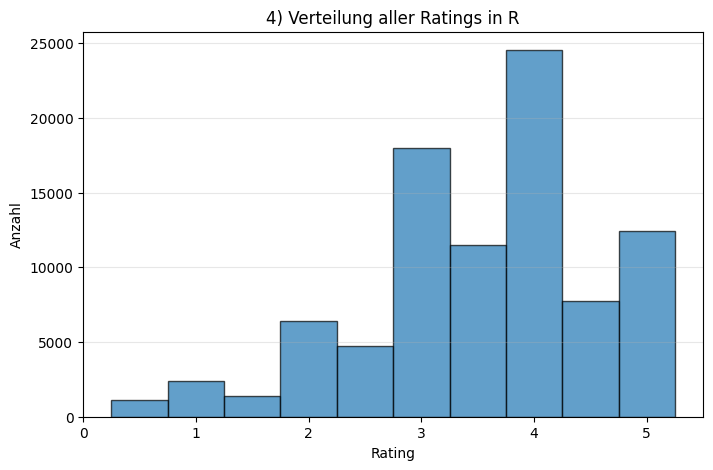

4)  Verteilung der Ratings (Plot 4): Die Verteilung ist klar linksschief (negative Skewness). Das am häufigsten vergebene Rating ist 4.0, gefolgt von 3.0 und 5.0. Ratings unter 3.0 kommen vergleichsweise selten vor. Dies deutet darauf hin, dass Nutzer dazu tendieren, Filme zu bewerten, die sie mögen, oder generell wohlwollend bewerten.


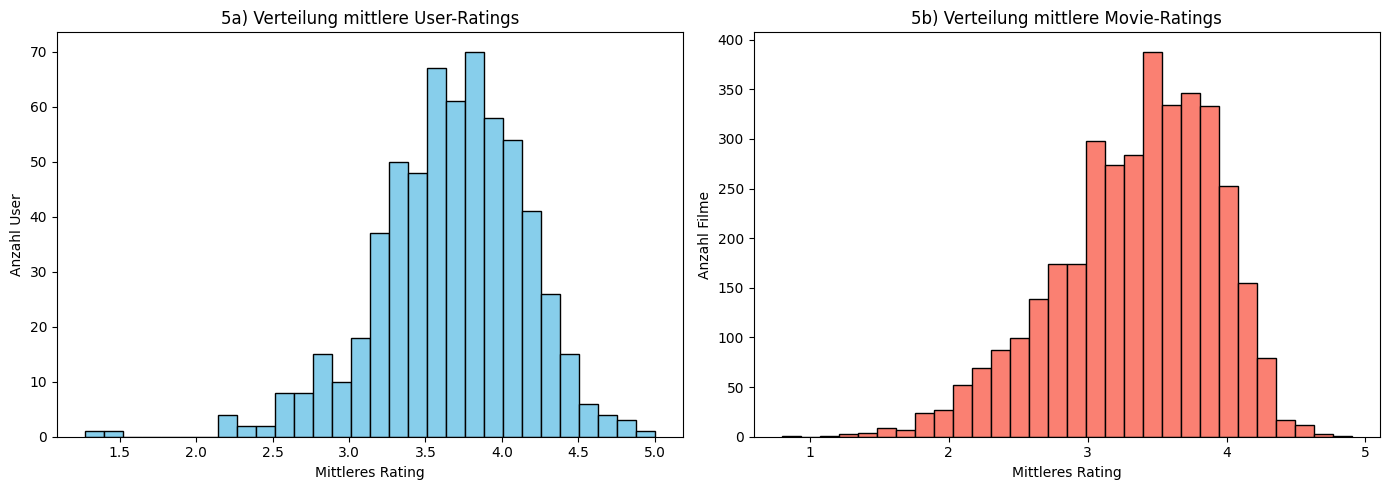

5)  Verteilung der Mittelwerte (Plot 5a/5b): Beide Verteilungen ähneln einer Normalverteilung (Glockenkurve). Die mittleren User-Ratings (links) zentrieren sich um ca. 3.7, was bestätigt, dass Nutzer im Schnitt großzügig sind. Die mittleren Movie-Ratings (rechts) sind etwas breiter gestreut und zentrieren sich etwas tiefer bei ca. 3.5, da hier auch qualitativ schlechtere Filme enthalten sind, die von Usern seltener geschaut/bewertet werden.
6) Bester Film: 'The Trial' (4.90). Schlechtester Film: 'Police Academy: Mission to Moscow' (0.80).


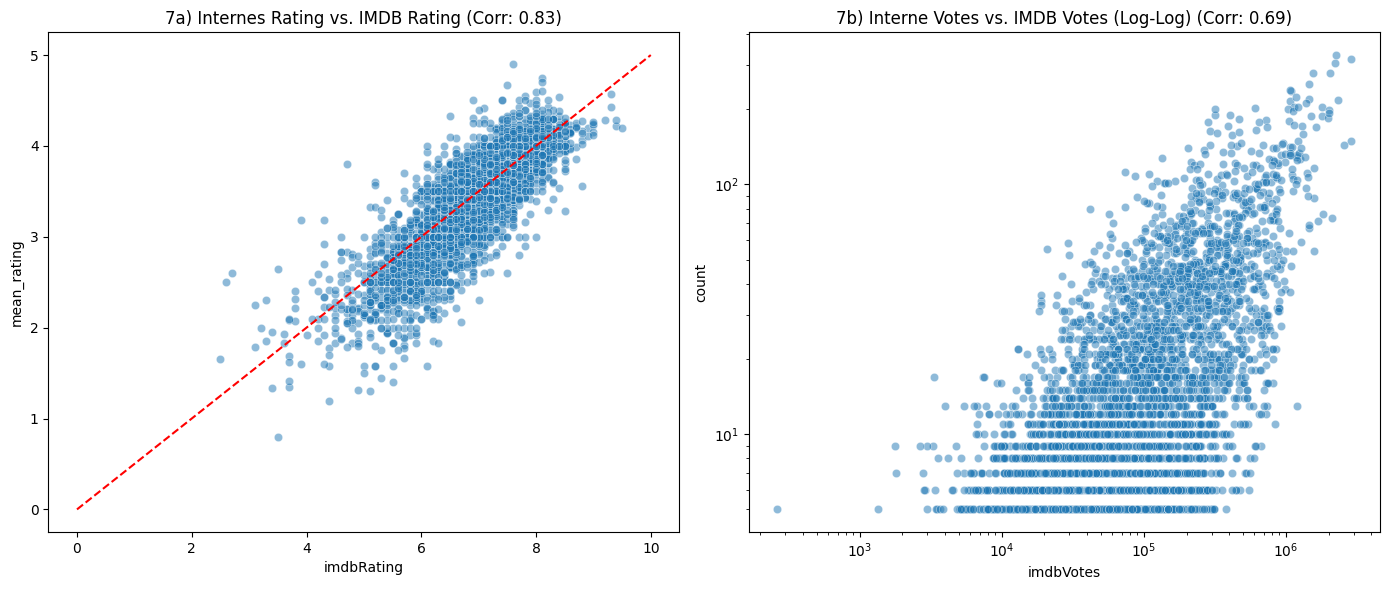

7)  Zusammenhang mit IMDB (Plot 7a/7b): Es besteht ein starker positiver Zusammenhang zwischen den internen Ratings und den IMDB-Ratings (Korrelationskoeffizient 0.83). Die Punkte streuen relativ eng um die Diagonale. Auch bei der Anzahl der Votes (Popularität) gibt es eine deutliche positive Korrelation (0.69, Log-Log-Skala), was bedeutet: Was auf IMDB populär ist, wird auch in diesem Datensatz oft bewertet.
8) Anomalien: Ein Extrem-User ist ID 414 mit extrem vielen Bewertungen (2130). Eine Film-Anomalie ist 'Problem Child', da hier das interne Rating (1.6) stark vom (skalierten) IMDB-Rating (2.8) abweicht.


In [3]:
from typing import Dict, Tuple

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csc_matrix


def create_rating_matrix(
    df: pd.DataFrame,
) -> (np.ndarray, Dict[int, int], Dict[int, int]):
    """Create Ratings Matrix and Mapping Tables (dense NumPy version).

    Args:
        df: pd.DataFrame with columns [movieId, userId, rating]

    Returns:
        Ratings-Matrix (np.ndarray),
        Column-No to Movie-ID Mapper (Dict[column_number, movieId]),
        Row-No to User-ID Mapper (Dict[row_number, userId])

    Remark:
        Zero-Entries in Ratings-Matrix are missing / non-existing ratings
    """
    # Mapping Tables (unverändert)
    map_movie_to_id = {k: i for i, k in enumerate(df["movieId"].unique())}
    map_user_to_id = {k: i for i, k in enumerate(df["userId"].unique())}

    map_col_id_to_movie = {v: k for k, v in map_movie_to_id.items()}
    map_row_id_to_user_id = {v: k for k, v in map_user_to_id.items()}

    # Map IDs
    mapped_user_id = df["userId"].map(map_user_to_id).values
    mapped_movie_id = df["movieId"].map(map_movie_to_id).values
    ratings_values = df["rating"].values

    # Create dense Ratings Matrix (initialize with zeros)
    n_users = len(map_user_to_id)
    n_movies = len(map_movie_to_id)
    ratings = np.zeros((n_users, n_movies))

    # Fill matrix using advanced indexing (vektorisiert!)
    ratings[mapped_user_id, mapped_movie_id] = ratings_values

    return ratings, map_col_id_to_movie, map_row_id_to_user_id


# ---------------------------------------------------------
# LÖSUNG AUFGABE 1
# ---------------------------------------------------------

# 1. Daten einlesen
df_movies = pd.read_csv("./data/movies.csv")
df_ratings = pd.read_csv("./data/ratings.csv")

# 1) Beschreibe die Datensätze
print(
    "1) Die Datensätze bestehen aus Metadaten zu Filmen (Titel, Jahr, Genres, IMDB-Daten, Altersfreigabe (+18 oder nicht), runtime) und User-Ratings. "
    "Sie sind über die 'movieId' verknüpft. Es handelt sich um explizites Feedback (Sterne-Bewertungen)."
)
print(f"   Shape Movies: {df_movies.shape}, Shape Ratings: {df_ratings.shape}")

# 2) Erstelle die Rating-Matrix R
R, map_col_to_movie, map_row_to_user = create_rating_matrix(df_ratings)

N_u, N_i = R.shape
print(f"2) Rating-Matrix R erstellt.")
print(f"   Dimensionen (N_u x N_i): {N_u} User x {N_i} Items")
# Verifikation
assert N_u == df_ratings["userId"].nunique()
assert N_i == df_ratings["movieId"].nunique()
print("   Verifikation erfolgreich: Dimensionen stimmen mit einzigartigen IDs überein.")

# 3) Sparsity
# Logik übernommen aus rsy_mc.py Exercise 1g
# Sparsity = 1 - (non_zero_elements / total_elements)
num_ratings = np.count_nonzero(R)
total_elements = R.size
sparsity = 1.0 - (num_ratings / total_elements)
print(
    f"3) Die Sparsity beträgt: {sparsity:.4f} (Das bedeutet, {sparsity*100:.2f}% der Matrix sind leer/Nullen)."
)

# 4) Verteilung der Ratings (Global)
global_ratings = R[R > 0].flatten()

plt.figure(figsize=(8, 5))
plt.hist(global_ratings, bins=np.arange(0.25, 5.5, 0.5), edgecolor="black", alpha=0.7)
plt.title("4) Verteilung aller Ratings in R")
plt.xlabel("Rating")
plt.ylabel("Anzahl")
plt.grid(axis="y", alpha=0.3)
plt.show()
print(
    "4)  Verteilung der Ratings (Plot 4): "
    "Die Verteilung ist klar linksschief (negative Skewness). Das am häufigsten vergebene Rating ist 4.0, "
    "gefolgt von 3.0 und 5.0. Ratings unter 3.0 kommen vergleichsweise selten vor. "
    "Dies deutet darauf hin, dass Nutzer dazu tendieren, Filme zu bewerten, die sie mögen, "
    "oder generell wohlwollend bewerten."
)

# 5) Verteilung mittlere User- und Movie-Ratings
# Da R Nullen enthält, können wir nicht einfach .mean() nutzen.
# Wir nutzen Masking.
# User Mean (Zeilenweise): Summe / Anzahl nicht-null
user_sums = R.sum(axis=1)
user_cnts = (R > 0).sum(axis=1)
# Vermeidung von Division durch Null (sollte bei cleaned data nicht passieren, aber sicher ist sicher)
user_means = np.divide(
    user_sums, user_cnts, out=np.zeros_like(user_sums), where=user_cnts != 0
)

# Movie Mean (Spaltenweise)
movie_sums = R.sum(axis=0)
movie_cnts = (R > 0).sum(axis=0)
movie_means = np.divide(
    movie_sums, movie_cnts, out=np.zeros_like(movie_sums), where=movie_cnts != 0
)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# User Means Plot
axes[0].hist(user_means[user_means > 0], bins=30, color="skyblue", edgecolor="black")
axes[0].set_title("5a) Verteilung mittlere User-Ratings")
axes[0].set_xlabel("Mittleres Rating")
axes[0].set_ylabel("Anzahl User")

# Movie Means Plot
axes[1].hist(movie_means[movie_means > 0], bins=30, color="salmon", edgecolor="black")
axes[1].set_title("5b) Verteilung mittlere Movie-Ratings")
axes[1].set_xlabel("Mittleres Rating")
axes[1].set_ylabel("Anzahl Filme")

plt.tight_layout()
plt.show()
print(
    "5)  Verteilung der Mittelwerte (Plot 5a/5b): "
    "Beide Verteilungen ähneln einer Normalverteilung (Glockenkurve). "
    "Die mittleren User-Ratings (links) zentrieren sich um ca. 3.7, was bestätigt, dass Nutzer im Schnitt großzügig sind. "
    "Die mittleren Movie-Ratings (rechts) sind etwas breiter gestreut und zentrieren sich etwas tiefer bei ca. 3.5, "
    "da hier auch qualitativ schlechtere Filme enthalten sind, die von Usern seltener geschaut/bewertet werden."
)

# 6) Bester und schlechtester Film

# Indizes finden
best_idx = np.argmax(movie_means)
worst_idx = np.argmin(
    movie_means[movie_means > 0]
)  # argmin bei >0, sonst finden wir unrated (0.0)

# Da wir bei worst_idx maskiert haben, ist der Index verschoben.
df_stats = pd.DataFrame(
    {"col_id": range(len(movie_means)), "mean_rating": movie_means, "count": movie_cnts}
)
df_stats["movieId"] = df_stats["col_id"].map(map_col_to_movie)
# Merge mit Titeln
df_stats = df_stats.merge(df_movies[["movieId", "title"]], on="movieId", how="left")

best_movie = df_stats.loc[df_stats["mean_rating"].idxmax()]
# Für schlechtesten nehmen wir nur die, die überhaupt bewertet wurden
worst_movie = df_stats.loc[df_stats[df_stats["count"] > 0]["mean_rating"].idxmin()]

print(
    f"6) Bester Film: '{best_movie['title']}' ({best_movie['mean_rating']:.2f}). "
    f"Schlechtester Film: '{worst_movie['title']}' ({worst_movie['mean_rating']:.2f})."
)

# 7) Zusammenhang IMDB Rating/Votes und interne Ratings
# Merge interne Stats mit IMDB Spalten
df_corr = df_stats[df_stats["count"] > 0].merge(
    df_movies[["movieId", "imdbRating", "imdbVotes"]], on="movieId", how="inner"
)

# Korrelation berechnen
corr_rating = df_corr["mean_rating"].corr(df_corr["imdbRating"])
corr_votes = df_corr["count"].corr(df_corr["imdbVotes"])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter: Internal Mean vs IMDB Rating
sns.scatterplot(data=df_corr, x="imdbRating", y="mean_rating", ax=axes[0], alpha=0.5)
axes[0].set_title(f"7a) Internes Rating vs. IMDB Rating (Corr: {corr_rating:.2f})")
axes[0].plot([0, 10], [0, 5], "r--", label="Skalierungslinie")  # Grobe Orientierung

# Scatter: Internal Votes vs IMDB Votes
sns.scatterplot(data=df_corr, x="imdbVotes", y="count", ax=axes[1], alpha=0.5)
axes[1].set_xscale("log")
axes[1].set_yscale("log")
axes[1].set_title(
    f"7b) Interne Votes vs. IMDB Votes (Log-Log) (Corr: {corr_votes:.2f})"
)

plt.tight_layout()
plt.show()
print(
    "7)  Zusammenhang mit IMDB (Plot 7a/7b): "
    "Es besteht ein starker positiver Zusammenhang zwischen den internen Ratings und den IMDB-Ratings "
    "(Korrelationskoeffizient 0.83). Die Punkte streuen relativ eng um die Diagonale. "
    "Auch bei der Anzahl der Votes (Popularität) gibt es eine deutliche positive Korrelation (0.69, Log-Log-Skala), "
    "was bedeutet: Was auf IMDB populär ist, wird auch in diesem Datensatz oft bewertet."
)

# 8) Anomalien
# Definition "Extrem":
# User: Der "Power-User" (meiste Ratings) vs. der "Hater/Fanboy" (Varianz 0)
# Movie: Grosse Diskrepanz zwischen IMDB (normiert auf 5) und unserem Rating bei > 50 Votes

# User Anomalie
user_counts_series = pd.Series(user_cnts)
extreme_user_idx = user_counts_series.idxmax()
extreme_user_id = map_row_to_user[extreme_user_idx]

# Movie Anomalie (Grosse Differenz)
# IMDB ist Skala 1-10, wir 0.5-5. Wir teilen IMDB durch 2 für Vergleich.
df_corr["diff"] = abs(df_corr["mean_rating"] - (df_corr["imdbRating"] / 2))
# Nur Filme mit Relevanz (z.B. > 10 Votes intern)
anom_movie = df_corr[df_corr["count"] > 10].sort_values("diff", ascending=False).iloc[0]

print(
    f"8) Anomalien: Ein Extrem-User ist ID {extreme_user_id} mit extrem vielen Bewertungen ({int(user_cnts[extreme_user_idx])}). "
    f"Eine Film-Anomalie ist '{anom_movie['title']}', da hier das interne Rating ({anom_movie['mean_rating']:.1f}) "
    f"stark vom (skalierten) IMDB-Rating ({anom_movie['imdbRating']/2:.1f}) abweicht."
)

## Aufgabe 2 (15 Punkte)

In dieser Aufgabe implementierst du einen Sklearn-Estimator um ein Modell der Daten zu fitten mit dem Empfehlungen generiert werden können.

Du möchtest eine Rating Matrix $R$ in zwei Matrizen $U \in \mathbb{R}^{N_u \times K}$ (User-Faktoren) und $M \in \mathbb{R}^{N_i \times K}$ (Movie-Faktoren) faktorisieren. Die Faktorisierung $\hat{R}$ soll $R$ möglichst gut approximieren im Sinne des quadrierten Fehlers. $K$ sind die Anzahl Faktoren.

Die Gleichung sieht folgendermassen aus und enthält zusätzlich noch Bias-Vektoren.

\begin{align}
R \approx \hat{R} = UM^T + \mathbf{b_u} + \mathbf{b_m}^T + \overline{r}
\end{align}

$R$ hat die Dimensionalität $R \in \mathbb{R}^{N_u \times N_i}$, wobei $N_u$ die Anzahl Users sind und $N_i$ die Anzahl Items. $\mathbf{b}_u \in \mathbb{R}^{N_u}$ ist ein User-Bias Vektor, $\mathbf{b}_m \in \mathbb{R}^{N_i}$ ein Item-Bias Vektor, und $\overline{r}$ das globale Durchschnittsrating (die Bias-Vektoren müssen mit _broadcasting_ addiert werden). 

Die Hoffnung ist, dass $\hat{R}$ dort wo $R$ keine Einträge hat (da die Matrix $R$ relativ sparse ist), realistische Einträge erzeugt, die für Empfehlungen genutzt werden können.

Wir möchten den quadrierten Fehler zwischen $\hat{R}$ und $R$ minimieren. Zusätzlich möchten wir mit einer Regularisierung ($\Omega$) Overfitting verhindern. Dazu definieren wir folgende Kostenfunktion:

\begin{align}
J(U, M, \mathbf{b_u},\mathbf{b_m}) &= \frac{1}{| \mathbb{Z} |} \Big(\sum_{u, i \in \mathbb{Z}} \frac{1}{2}(r^{(u,i)} - \hat{r}^{(u,i)})^2 + \sum_{u, i \in \mathbb{Z}} \Omega^{(u, i)} \Big)
\end{align}

Wobei:

\begin{align}
\hat{r}^{(u,i)} &= \mathbf{u}^{(u)T} \mathbf{m}^{(i)} + b_u^{(u)} + b_m^{(i)} \\
\Omega^{(u, i)} &= \frac{\lambda}{2} \Big( \lVert \mathbf{u}^{(u)} \rVert^2_2 +  \lVert \mathbf{m}^{(i)} \rVert^2_2 + b_u^{(u)2} + b_m^{(i)2} \Big)
\end{align}

$\mathbb{Z}$ ist das Set der bekannten/nicht-null Einträge der Rating-Matrix $R$ (alle Kombinationen von $(u,r)$ die vorkommen). $\mathbf{u}^{(u)T}$ ist der $u$-te Zeilenvektor von $U$ und $\mathbf{m}^{(i)}$ der $i$-te Spaltenvektor von $M^T$. $\lambda$ ist der Regularisierungsfaktor. Das globale Durchschnittsrating $\overline{r}$ berechnen wir auf $R$ und ziehen das von allen Ratings ab. Wir führen die Optimisierung als auf $R_{\text{center}} = R - \overline{r}$ durch. Die quadrierte L-2 Norm ist folgendermassen definiert: $\lVert \mathbf{z} \rVert^2_2 = \sum_i (z^{(i)})^2$.

### Optimisierung mit Stochastic Gradient Descent (SGD)

Man optimiert die Kostenfunktion abwechselnd, mal für $\mathbf{u}^{(u)T}$ und dann für $\mathbf{m}^{(i)}$ (und die Biases), wobei man die andere Variable jeweils konstant hält. Das führt zu einem _least squares_ Optimisierungs-Problem. Mit _SGD_ approximiert man die Kostenfunktion (und deren Gradienten) mit einem per Sample-Loss $L$:

Mit $M$ fix:
\begin{align}
L(U, r^{(u,i)}) &= \frac{1}{2} (r^{(u,i)} - \hat{r}^{(u,i)})^2 + \Omega^{(u, i)} \\
J(U) &= \mathbb{E}_{u,i \sim \mathbb{Z}} L(U, r^{(u,i)}) = \frac{1}{| \mathbb{Z} |} \sum_{u, i \in \mathbb{Z}}  L(U, r^{(u,i)})
\end{align}

Mit $U$ fix:
\begin{align}
L(M, r^{(u,i)}) &= \frac{1}{2} (r^{(u,i)} - \hat{r}^{(u,i)})^2 + \Omega^{(u, i)} \\
J(M) &= \mathbb{E}_{u,i \sim \mathbb{Z}} L(M, r^{(u,i)}) = \frac{1}{| \mathbb{Z} |} \sum_{u, i \in \mathbb{Z}}  L(M, r^{(u,i)})
\end{align}

### Algorithmus

Wir optimieren die Kostenfunktion für jeden Eintrag in der Rating-Matrix $R$ mit folgendem Algorithmus. Wobei $\eta$ die _learning rate_ ist und $t$ den Iterationschritt indexiert.

For all $u, i \in \mathbb{Z}$ do:

\begin{align}
\mathbf{u}^{(u)}_{t+1} &= \mathbf{u}^{(u)}_{t} - \eta \frac{\partial L(U, r^{(u,i)})}{\partial \mathbf{u}^{(u)}_{t}} \\
\mathbf{m}^{(i)}_{t+1} &= \mathbf{m}^{(i)}_{t} - \eta \frac{\partial L(M, r^{(u,i)})}{\partial \mathbf{m}^{(i)}_{t}} \\
b_{m, t+1}^{(i)} &= b_{m, t}^{(i)} - \eta \frac{\partial L(U, r^{(u,i)})}{\partial b_{m, t}^{(i)}} \\
b_{u, t+1}^{(u)} &= b_{u, t}^{(u)} - \eta \frac{\partial L(U, r^{(u,i)})}{\partial b_{u, t}^{(u)}} \\
\end{align}

Repeat until _max epochs_ is reached.

### Implementation

Ergänze die Klasse `SparseMatrixFactorization`.


**Beachte:**

- In sklearn wird statt $\lambda$ jeweils $\alpha$ `alpha` als Bezeichnung für die Regularisierungsstärke verwendet (wohl weil `lambda` ein reserviertes Wort ist in Python).

- $n$ bezeichnet Anzahl Datenpunkte. Ausserdem: $w$ ist ein Skalar, $\mathbf{w}$ ein Vektor und $\mathbf{W}$ eine Matrix.

- Implementiere alles vektorisiert.



In [4]:
from typing import Self, Tuple
from sklearn.base import BaseEstimator
import numpy as np
from numpy.random import default_rng
from tqdm.auto import tqdm


class SparseMatrixFactorization(BaseEstimator):
    """Sparse Matrix Factorization with Stochastic Gradient Descent"""

    def __init__(
        self,
        alpha: float,
        lr: float,
        num_components: int,
        num_epochs: int,
        random_seed: int = 123,
    ):
        """
        Args:
            alpha: regularization constant
            lr: learning rate constant
            num_components: dimensionaliy of each user / item vector
            num_epochs: number of passes over each entry in the Rating matrix
            random_seed: random seed for reproducibility
        """
        self.alpha = alpha
        self.lr = lr
        self.num_components = num_components
        self.num_epochs = num_epochs
        self.random_seed = random_seed

        # Interne Attribute
        self.global_mean_ = 0.0
        self.U_ = None  # User Matrix
        self.M_ = None  # Item Matrix (Transposed in math, but stored as Item x K here)
        self.b_u_ = None  # User Biases
        self.b_m_ = None  # Item Biases

    def _initialize(self, X: np.ndarray) -> None:
        """Initiaizes user and item weights and biases.

        Args:
            X (num_users, num_items) - The Rating Matrix

        Returns:
            None
        """
        n_users, n_items = X.shape
        rng = default_rng(self.random_seed)

        # 1. Global Mean berechnen (nur auf nicht-null Einträgen)
        # X ist sparse mit 0 als "missing", daher maskieren wir die 0 Werte
        non_zeros = X[X != 0]
        if len(non_zeros) > 0:
            self.global_mean_ = np.mean(non_zeros)
        else:
            self.global_mean_ = 0.0

        # 2. Latente Faktoren initialisieren (U und M)
        # Kleine Zufallswerte um 0 herum
        scale = 0.1
        self.U_ = rng.normal(loc=0.0, scale=scale, size=(n_users, self.num_components))
        self.M_ = rng.normal(loc=0.0, scale=scale, size=(n_items, self.num_components))

        # 3. Biases initialisieren (mit 0)
        self.b_u_ = np.zeros(n_users)
        self.b_m_ = np.zeros(n_items)

    def fit(self, X: np.ndarray) -> Self:
        """Fit the model.

        Args:
            X (num_users, num_items) - The Rating Matrix

        Returns:
            Self
        """
        self._initialize(X)
        self.epoch_end_cost_ = list()

        # Indizes der bekannten Ratings finden (wo X != 0)
        # rows = User Indices, cols = Item Indices
        rows, cols = X.nonzero()
        n_ratings = len(rows)

        # Für Random Shuffling der Indizes (SGD braucht Zufälligkeit)
        indices = np.arange(n_ratings)
        rng = default_rng(self.random_seed)

        # Training Loop
        for _ in tqdm(range(self.num_epochs), desc="Training Epochs"):

            # Shuffle Training Data pro Epoche
            rng.shuffle(indices)

            # Stochastic Gradient Descent Step
            for idx in indices:
                u, i = rows[idx], cols[idx]
                self.take_one_step(X, (u, i))

            # Kosten am Ende der Epoche berechnen
            # Wir nutzen Vektorisierte Berechnung für Speed
            pred_matrix = self.predict()
            costs = self.calc_cost(X, pred_matrix)
            self.epoch_end_cost_.append(costs)

        return self

    def take_one_step(self, X: np.ndarray, rating: Tuple[int, int]) -> None:
        """Take one gradient descent step for a specific item/user weight.

        Args:
            X (num_users, num_items) - The Rating Matrix
            rating (row_idx, column_idx) - Rating coordinates specified via
                User (row-index) and Item (column-index) for which to
                calculate the gradient for

        Returns:
            None
        """
        u, i = rating
        r_ui = X[u, i]  # Tatsächliches Rating

        # Vorhersage berechnen: dot(u, m) + bu + bi + mu
        # Hinweis: Vektorisierter Dot-Product zweier Vektoren
        dot_prod = np.dot(self.U_[u], self.M_[i])
        hat_r_ui = dot_prod + self.b_u_[u] + self.b_m_[i] + self.global_mean_

        # Fehler berechnen
        error = r_ui - hat_r_ui

        # Gradienten berechnen
        dJ_dU, dJ_dM, dJ_dbu, dJ_dbm = self.calc_gradients(
            error, self.M_[i], self.U_[u], self.b_u_[u], self.b_m_[i]
        )

        # Update Steps (Gradient Descent: w = w - lr * grad)
        # Die Gradienten-Funktion gibt die Ableitung zurück.
        # Update-Regel laut Markdown: w_new = w_old - eta * dL/dw
        self.U_[u] -= self.lr * dJ_dU
        self.M_[i] -= self.lr * dJ_dM
        self.b_u_[u] -= self.lr * dJ_dbu
        self.b_m_[i] -= self.lr * dJ_dbm

    def calc_gradients(
        self,
        error: float,
        m_item: np.ndarray,
        u_user: np.ndarray,
        bias_user: float,
        bias_item: float,
    ) -> Tuple[np.ndarray, np.ndarray, float, float]:
        """Calculate Gradients
        Args:
            error: for a single rating entry (r - r_hat)
            m_item: weights of a single item [num_components]
            u_user: weights of a single user [num_components]
            bias_user: bias of a single user (scalar)
            bias_item: bias of a single item (scalar)
        Returns:
            Tuple (dJ_dUser, dJ_dItem, dJ_dUserBias, dJ_dItemBias)
        """
        # Formeln aus dem Markdown:
        # L = 0.5 * (r - r_hat)^2 + 0.5 * alpha * (||u||^2 + ...)
        # dL/du = -(r - r_hat) * m + alpha * u
        # Hier: error = (r - r_hat), also dL/du = -error * m + alpha * u

        dJ_dUser = -error * m_item + self.alpha * u_user
        dJ_dItem = -error * u_user + self.alpha * m_item
        dJ_dUserBias = -error + self.alpha * bias_user
        dJ_dItemBias = -error + self.alpha * bias_item

        return dJ_dUser, dJ_dItem, dJ_dUserBias, dJ_dItemBias

    def predict(self) -> np.ndarray:
        """Calculate Approximation of Rating Matrix
        Returns:
            Approximation of Rating Matrix [num_users, num_items]
        """
        # Matrix-Multiplikation U * M^T
        # Shape: (N_u, K) @ (K, N_i) -> (N_u, N_i)
        base_pred = self.U_ @ self.M_.T

        # Biases und Global Mean addieren (Broadcasting)
        # b_u: (N_u, 1), b_m: (1, N_i)
        pred = (
            base_pred
            + self.b_u_[:, np.newaxis]
            + self.b_m_[np.newaxis, :]
            + self.global_mean_
        )

        return pred

    def score(self, X: np.ndarray) -> float:
        """Mean Squared Error between X and Approximation (MSE)
        Args:
            X: Ratings Matrix [num_users, num_items]
        Returns:
            MSE (float)
        """
        pred = self.predict()

        # Nur auf bekannten Ratings evaluieren (X != 0)
        mask = X != 0
        mse = np.mean((X[mask] - pred[mask]) ** 2)
        return mse

    def score_mae(self, X: np.ndarray) -> float:
        """Mean Absolute Error between X and Approximation (MAE)
        Args:
            X: Ratings Matrix [num_users, num_items]
        Returns:
            MAE (float)
        """
        pred = self.predict()
        mask = X != 0
        mae = np.mean(np.abs(X[mask] - pred[mask]))
        return mae

    def calc_cost(
        self, y_true: np.ndarray, y_pred: np.ndarray
    ) -> Tuple[float, float, float]:
        """Cost function
        Args:
            y_true: Ratings Matrix [num_users, num_items]
            y_pred: Predicted Ratings Matrix [num_users, num_items]
        Returns:
            Tuple with (total cost, squared_error_cost, regularization_cost)
        """
        # Nur bekannte Ratings betrachten
        mask = y_true != 0
        n_samples = np.sum(mask)  # |Z|

        if n_samples == 0:
            return 0.0, 0.0, 0.0

        # 1. Squared Error Term: Sum 0.5 * (r - r_hat)^2
        residuals = y_true[mask] - y_pred[mask]
        sq_err_sum = 0.5 * np.sum(residuals**2)

        # 2. Regularization Term: Sum 0.5 * alpha * (...)
        rows, cols = np.nonzero(y_true)

        # Normen für die beteiligten User/Items quadriert
        u_norms = np.sum(self.U_[rows] ** 2, axis=1)
        m_norms = np.sum(self.M_[cols] ** 2, axis=1)
        bu_sq = self.b_u_[rows] ** 2
        bm_sq = self.b_m_[cols] ** 2

        reg_sum = 0.5 * self.alpha * np.sum(u_norms + m_norms + bu_sq + bm_sq)

        # 3. Durchschnitt bilden (1 / |Z|)
        total_cost = (sq_err_sum + reg_sum) / n_samples
        squared_error_cost = sq_err_sum / n_samples
        regularization_cost = reg_sum / n_samples

        return total_cost, squared_error_cost, regularization_cost

/Users/lucamanna/Documents/00_Coding/fhnw/05_MachineLearning/gml/gml/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Die folgende Zelle enthält verschiedene Tests die Ihre Implementation prüfen. Sorge dafür, dass die folgenden Tests erfolgreich sind. Stelle sicher, dass die Input-Shapes der Methoden die du implementierst den Doc-Strings entsprechen.

**Achtung: Die Tests sind sehr simpel. Du kannst also nicht davon ausgehen, dass deine Implementation korrekt ist sobald die Tests erfolgreich sind.**

Deine Abgabe wird noch mit weiteren, für dich nicht sichtbaren Tests, geprüft. Es ist grundsätzlich deine Aufgabe, die Implementation genau zu prüfen. Du kannst dazu weitere Zellen mit eigenen Tests einfügen. Du kannst jedoch die folgende Zelle nicht ändern. Diese wird nach Abgabe wieder überschrieben, sodass die von mir definierten Tests ausgeführt werden.

In [5]:
import numpy as np


def print_result(test_name, passed, expected, actual):
    status = "Passed" if passed else "Failed"
    print(f"{status} test: {test_name}")
    print(f"----> Expected: {expected}")
    print(f"----> Actual: {actual}")


def test_ones_matrix():
    # Create a ones matrix
    X = np.ones((5, 5))

    # Initialize the model
    model = SparseMatrixFactorization(
        alpha=0, lr=0.01, num_components=2, num_epochs=50, random_seed=123
    )

    # Fit the model
    model.fit(X)

    # Make predictions
    predictions = model.predict()

    try:
        np.testing.assert_allclose(predictions, 1, atol=0.1)
        print_result("test_ones_matrix", True, np.ones((5, 5)), predictions)
    except AssertionError as e:
        print_result("test_ones_matrix", False, np.ones((5, 5)), predictions)


def test_twos_matrix():
    X = np.ones((5, 5)) + 1

    # Initialize the model
    model = SparseMatrixFactorization(
        alpha=0, lr=0.01, num_components=2, num_epochs=50, random_seed=123
    )

    # Fit the model
    model.fit(X)

    # Make predictions
    predictions = model.predict()

    try:
        np.testing.assert_allclose(predictions, 2, atol=0.1)
        print_result("test_twos_matrix", True, np.ones((5, 5)) + 1, predictions)
    except AssertionError as e:
        print_result("test_twos_matrix", False, np.ones((5, 5)) + 1, predictions)


def test_random_matrix():
    X = np.array([[4, 1, 4, 2], [3, 5, 2, 2], [2, 3, 1, 4], [2, 3, 2, 2]])

    # Initialize the model
    model = SparseMatrixFactorization(
        alpha=0, lr=0.1, num_components=4, num_epochs=100, random_seed=123
    )

    # Fit the model
    model.fit(X)

    # Make predictions
    predictions = model.predict()

    # The predictions should be close to the input, since there are no missing (zero) entries
    try:
        np.testing.assert_allclose(predictions, X, atol=0.1)
        print_result("test_random_matrix", True, X, predictions)
    except AssertionError as e:
        print_result("test_random_matrix", False, X, predictions)


def test_sparse_matrix():
    # Create a 5x6 matrix with random values and some zeros
    X = np.array(
        [
            [5, 3, 0, 1, 2, 0],
            [4, 0, 3, 0, 0, 2],
            [0, 1, 5, 0, 3, 4],
            [2, 0, 0, 4, 1, 0],
            [0, 4, 2, 0, 0, 5],
        ]
    )

    # Initialize the model
    model = SparseMatrixFactorization(
        alpha=0, lr=0.1, num_components=4, num_epochs=100, random_seed=123
    )

    # Fit the model
    model.fit(X)

    # Make predictions
    predictions = model.predict()

    try:
        # Check that non-zero entries are close to the input values
        non_zero_indices = np.nonzero(X)
        np.testing.assert_allclose(
            predictions[non_zero_indices], X[non_zero_indices], atol=1.0
        )
        print_result(
            "test_sparse_matrix",
            True,
            X[non_zero_indices],
            predictions[non_zero_indices],
        )
    except:
        print_result(
            "test_sparse_matrix",
            False,
            X[non_zero_indices],
            predictions[non_zero_indices],
        )

    try:
        # Check that zero entries in the original matrix are now non-zero in the predictions
        zero_indices = np.where(X == 0)
        assert np.all(predictions[zero_indices] >= 0.0)
        print_result(
            "test_sparse_matrix", True, "all larger than 0.0", predictions[zero_indices]
        )
    except AssertionError as e:
        print_result(
            "test_sparse_matrix",
            False,
            "all larger than 0.0",
            predictions[zero_indices],
        )


for test in [
    test_ones_matrix,
    test_twos_matrix,
    test_random_matrix,
    test_sparse_matrix,
]:
    try:
        test()
    except Exception as e:
        print(f"Error during testing - test: {test} error: {e}")

Training Epochs: 100%|██████████| 50/50 [00:00<00:00, 149.33it/s]


Passed test: test_ones_matrix
----> Expected: [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
----> Actual: [[1.01068184 0.99565642 0.99374955 0.99220613 1.00594448]
 [0.99255901 1.00629934 1.00463449 1.01037422 0.98912798]
 [0.99044541 1.00352045 1.00557602 1.00643172 0.99548135]
 [0.99909147 0.99543154 1.00009008 0.99323621 1.00962462]
 [1.00661254 0.99907079 0.99627918 0.99782993 1.0000538 ]]


Training Epochs: 100%|██████████| 50/50 [00:00<00:00, 1294.25it/s]


Passed test: test_twos_matrix
----> Expected: [[2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]]
----> Actual: [[2.01068184 1.99565642 1.99374955 1.99220613 2.00594448]
 [1.99255901 2.00629934 2.00463449 2.01037422 1.98912798]
 [1.99044541 2.00352045 2.00557602 2.00643172 1.99548135]
 [1.99909147 1.99543154 2.00009008 1.99323621 2.00962462]
 [2.00661254 1.99907079 1.99627918 1.99782993 2.0000538 ]]


Training Epochs: 100%|██████████| 100/100 [00:00<00:00, 473.87it/s]


Passed test: test_random_matrix
----> Expected: [[4 1 4 2]
 [3 5 2 2]
 [2 3 1 4]
 [2 3 2 2]]
----> Actual: [[3.99987088 1.00001177 4.00005561 2.00000893]
 [2.99977312 5.00002748 2.00017984 2.0000225 ]
 [1.99985311 3.00001438 1.00008158 4.00000562]
 [2.0005816  2.99994605 1.99960723 1.99995678]]


Training Epochs: 100%|██████████| 100/100 [00:00<00:00, 1326.42it/s]

Passed test: test_sparse_matrix
----> Expected: [5 3 1 2 4 3 2 1 5 3 4 2 4 1 4 2 5]
----> Actual: [5. 3. 1. 2. 4. 3. 2. 1. 5. 3. 4. 2. 4. 1. 4. 2. 5.]
Passed test: test_sparse_matrix
----> Expected: all larger than 0.0
----> Actual: [2.71294994 2.63612918 1.64633039 1.26783897 1.81848737 3.96710323
 3.56211957 1.55231813 1.85462999 4.05195104 3.85926575 4.15378502
 1.90947274]


## Aufgabe 3 (6 Punkte)

Trainiere nun drei Modelle auf dem ganzen Datenset, berechne und gib jeweils `mean squared error` und `mean absolute error` aus. Plotte Total-Loss, Squared-Error-Loss und Regularisierungs-Loss pro Epoche in eine Grafik für jedes Modell. 


Verwende folgende Hyper-Parameter für Modell 1:

- $\lambda$: 1e-4
- $\eta$: 0.01
- $K$: 5
- `num_epochs`: 40


Verwende folgende Hyper-Parameter für Modell 2:

- $\lambda$: 1e-4
- $\eta$: 0.01
- $K$: 10
- `num_epochs`: 40

Verwende folgende Hyper-Parameter für Modell 3:

- $\lambda$: 1e-3
- $\eta$: 0.01
- $K$: 5
- `num_epochs`: 40



--- Training Modell 1 ---
Parameter: {'alpha': 0.0001, 'lr': 0.01, 'num_components': 5, 'num_epochs': 40}


Training Epochs: 100%|██████████| 40/40 [01:54<00:00,  2.86s/it]


Resultat Modell 1: MSE = 0.4389, MAE = 0.5076
--- Training Modell 2 ---
Parameter: {'alpha': 0.0001, 'lr': 0.01, 'num_components': 10, 'num_epochs': 40}


Training Epochs: 100%|██████████| 40/40 [00:52<00:00,  1.32s/it]


Resultat Modell 2: MSE = 0.3296, MAE = 0.4371
--- Training Modell 3 ---
Parameter: {'alpha': 0.001, 'lr': 0.01, 'num_components': 5, 'num_epochs': 40}


Training Epochs: 100%|██████████| 40/40 [00:47<00:00,  1.18s/it]


Resultat Modell 3: MSE = 0.4395, MAE = 0.5083


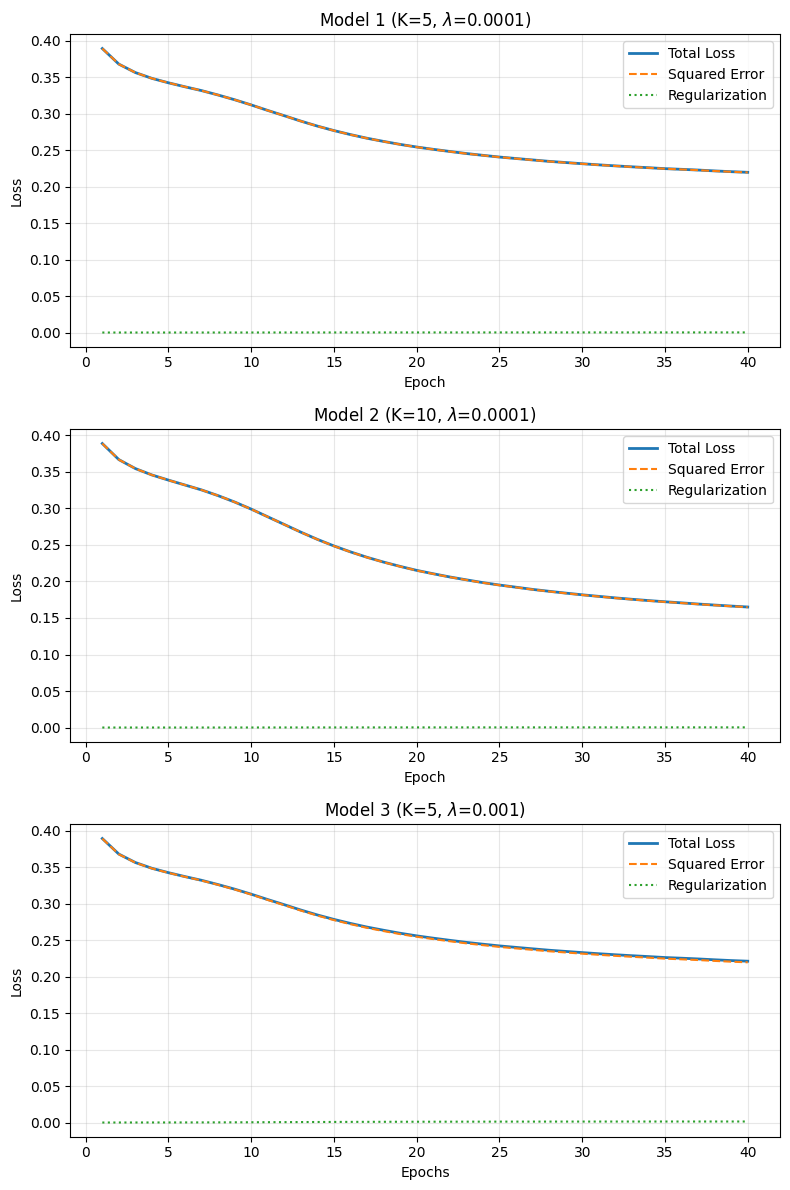

In [6]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

params = [
    {"alpha": 1e-4, "lr": 0.01, "num_components": 5, "num_epochs": 40},
    {"alpha": 1e-4, "lr": 0.01, "num_components": 10, "num_epochs": 40},
    {"alpha": 1e-3, "lr": 0.01, "num_components": 5, "num_epochs": 40},
]

fig, axes = plt.subplots(nrows=3, figsize=(8, 12))

for i, param in enumerate(params):

    print(f"--- Training Modell {i+1} ---")
    print(f"Parameter: {param}")

    # 1. Modell initialisieren
    model = SparseMatrixFactorization(
        alpha=param["alpha"],
        lr=param["lr"],
        num_components=param["num_components"],
        num_epochs=param["num_epochs"],
        random_seed=123,
    )

    # 2. Modell auf dem ganzen Datenset (R) trainieren
    model.fit(R)

    # 3. Metriken berechnen (MSE und MAE)
    # Ähnlich wie in RSY Exercise 3, aber hier nutzen wir die Methoden deiner Klasse
    mse = model.score(R)
    mae = model.score_mae(R)

    print(f"Resultat Modell {i+1}: MSE = {mse:.4f}, MAE = {mae:.4f}")

    # 4. Plotten der Loss-Kurven
    # Daten für Plot vorbereiten
    history = np.array(model.epoch_end_cost_)
    epochs = range(1, len(history) + 1)

    # DataFrame für Seaborn/Matplotlib
    df_loss = pd.DataFrame(
        {
            "Epoch": epochs,
            "Total Loss": history[:, 0],
            "Squared Error Loss": history[:, 1],
            "Regularization Loss": history[:, 2],
        }
    )

    # Plotten auf der entsprechenden Achse (axes[i])
    ax = axes[i]

    # Wir zeichnen 3 Linien
    sns.lineplot(
        data=df_loss, x="Epoch", y="Total Loss", ax=ax, label="Total Loss", linewidth=2
    )
    sns.lineplot(
        data=df_loss,
        x="Epoch",
        y="Squared Error Loss",
        ax=ax,
        label="Squared Error",
        linestyle="--",
    )
    sns.lineplot(
        data=df_loss,
        x="Epoch",
        y="Regularization Loss",
        ax=ax,
        label="Regularization",
        linestyle=":",
    )

    # Beschriftung
    ax.set_title(
        f"Model {i+1} (K={param['num_components']}, $\lambda$={param['alpha']})"
    )
    ax.set_ylabel("Loss")
    ax.grid(True, alpha=0.3)
    ax.legend()

axes[-1].set_xlabel("Epochs")
plt.tight_layout()
plt.show()

Diskutiere die Grafiken. Interpretiere die Unterschiede bezüglich der unterschiedlichen Hyper-Parameter.

### Konvergenzverhalten
Es ist zu erkennen, dass alle drei Modelle ein ähnliches Konvergenzverhalten zeigen. Alle drei Modelle zeigen zuerst eine starke Abnahme des Loss in den ersten 20 Epochen, gefolgt von einer langsameren Abnahme in den restlichen Epochen. Dies deutet darauf hin, dass die Modelle schnell lernen, die grundlegenden Muster in den Daten zu erfassen, bevor sie sich auf feinere Details konzentrieren.

### Einfluss der Anzahl latenter Faktoren ($K$)
Es wurden zwei unterschiedliche $K$ Werte getestet bei identischen anderen Hyper-Parametern:
- $K=5$: End-MSE $\approx 0.44$.
- $K=10$: End-MSE $\approx 0.33$

Ein höheres $K$ ermöglicht es dem Modell, komplexere Muster in den Daten zu erfassen, was zu einem niedrigeren MSE und MAE führt. Dies ist darauf zurückzuführen, dass mehr latente Faktoren eine feinere Repräsentation der Benutzer- und Filmpräferenzen ermöglichen.

Der Squared Error sinkt stärker, da das Modell flexibler ist.

Es kann jedoch nicht gesagt werden, mehr latente Faktoren immer besser sind, da dies auch zu Overfitting führen kann. 

### Regularisierung ($\lambda$)
Vergleich zwischen ($\lambda=10^{-4}$) und ($\lambda=10^{-3}$) bei identischem $K=5$:
- $\lambda=10^{-4}$: MSE $\approx 0.4389$
- $\lambda=10^{-3}$: MSE $\approx 0.4395$

Die Erhöhung von $\lambda=10^{-4}$ auf $\lambda=10^{-3}$ hat einen sehr kleinen Einfluss auf die End-MSE und MAE. 

In den Plots liegen die blaue Linie ("Total Loss") und die orange Linie ("Squared Error") fast perfekt übereinander, und die grüne Linie ("Regularization") verläuft optisch nahe bei 0. Dies deutet darauf hin, dass die Regularisierung in diesem Fall nur einen sehr geringen Beitrag zum Gesamtverlust leistet.

Wenn man die oberige Zelle mit einem höheren $\lambda$ Wert ausführt (z.B. $\lambda=10^{-1}$), erkennt man, dass die grüne Linie ("Regularization") deutlich höher liegt und auch keine gerade mehr ist. Gleichzeitig liegen ("Total Loss") und ("Squared Error") nicht mehr so eng beieinander. Dies zeigt, dass eine stärkere Regularisierung den Gesamtverlust stärker beeinflusst.

#### Funktionsweise der Regularisierung:
Die Regularisierung dient dazu, Overfitting zu vermeiden, indem sie die Komplexität des Modells bestraft. Mathematisch wird dem Optimierungsziel ein Strafterm hinzugefügt, der proportional zur Größe der gelernten Gewichte ist.

## Aufgabe 4 (6 Punkte)

In dieser Aufgabe versuchen wir ein möglichst gutes Modell zu finden.


Du wirst dazu einen zufällig generierten Train-Test Split erstellen. Dabei soll immer genau ein zufällig ausgewähltes Rating pro User dem Test-Split zugeordnet werden, wobei die anderen Ratings dieses Users im Train-Split bleiben. Verwende dazu die Funktion `leave_one_out_split`.

In [7]:
def leave_one_out_split(
    X: np.ndarray, random_seed=123
) -> Tuple[np.ndarray, np.ndarray]:
    """Split dataset by randomly assigning one element of each row to test, the others to train.

    Args:
        X: Ratings-Matrix [num_users, num_items]
        random_seed: for reproducibility

    Returns:
        Tuple(Xtrain [num_users, num_items], Xtest[num_users, num_items])
    """
    X_test = np.zeros_like(X)
    X_train = X.copy()

    random_state = np.random.RandomState(random_seed)

    for user_row in range(X.shape[0]):
        non_zero = X[user_row, :].nonzero()[0]
        item_col = random_state.choice(non_zero)
        X_test[user_row, item_col] = X[user_row, item_col]
        X_train[user_row, item_col] = 0

    return X_train, X_test


# X_train, X_test = leave_one_out_split(ratings)

# assert np.bincount(X_test.nonzero()[0]).max() == 1, \
#     "Each row (user) must have exactly 1 non-zero rating"

# assert all((ratings > 0).sum(axis=1) - (X_train > 0).sum(axis=1)) == 1, \
#     "Each user has exactly one rating less in the training set as compared to the full set"

Vergleiche mehrere Hyper-Parameter miteinander. Selektiere das beste Modell gemäss _Mean Absolute Error_ (MAE) mit einem geeigneten Verfahren. Verwende dazu die Funktion `leave_one_out_split`.

In [8]:
import itertools

# 2. Daten splitten
print("Erstelle Train-Test Split")
X_train, X_test = leave_one_out_split(R, random_seed=42)

# Verifizierung (optional, aber gut für das Gewissen)
print(f"Train Ratings: {np.count_nonzero(X_train)}")
print(f"Test Ratings:  {np.count_nonzero(X_test)}")

# Wir definieren ein Grid, das nun auch Training-Hyperparameter abdeckt (Es wurden im vorhinein beste Werte getestet und basiert darauf angepasst)
param_grid = {
    "num_components": [5, 10, 30, 45, 60],  # Bisherige Favoriten
    "alpha": [0.1, 0.2],  # Feintuning um 0.05
    "lr": [0.02, 0.05, 0.1],  # Neu: Lernrate variieren
    "num_epochs": [50],  # Neu: Längeres Training testen
}

# Erstelle alle Kombinationen
keys, values = zip(*param_grid.items())
combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

print(f"Starte Iteration 4 mit {len(combinations)} Kombinationen...")
print("-" * 60)

best_mae = float("inf")
best_params = None
results = []

for i, params in tqdm(
    enumerate(combinations), total=len(combinations), desc="Grid Search Progress"
):

    model = SparseMatrixFactorization(
        alpha=params["alpha"],
        lr=params["lr"],
        num_components=params["num_components"],
        num_epochs=params["num_epochs"],
        random_seed=123,
    )

    # Fit
    model.fit(X_train)

    # Evaluate
    mae_test = model.score_mae(X_test)

    results.append({**params, "MAE": mae_test})

    if mae_test < best_mae:
        best_mae = mae_test
        best_params = params

print("-" * 60)
print(f"Bester MAE (Iter 4): {best_mae:.4f}")
print(f"Beste Parameter (Iter 4): {best_params}")

# Top 10 Ergebnisse anzeigen
df_results = pd.DataFrame(results).sort_values("MAE")
print(df_results)

Erstelle Train-Test Split
Train Ratings: 89617
Test Ratings:  610
Starte Iteration 4 mit 30 Kombinationen...
------------------------------------------------------------


Grid Search Progress: 100%|██████████| 30/30 [20:05<00:00, 40.20s/it]

------------------------------------------------------------
Bester MAE (Iter 4): 0.6899
Beste Parameter (Iter 4): {'num_components': 30, 'alpha': 0.1, 'lr': 0.05, 'num_epochs': 50}
    num_components  alpha    lr  num_epochs       MAE
13              30    0.1  0.05          50  0.689876
25              60    0.1  0.05          50  0.692575
19              45    0.1  0.05          50  0.696860
24              60    0.1  0.02          50  0.697883
14              30    0.1  0.10          50  0.698868
18              45    0.1  0.02          50  0.699280
12              30    0.1  0.02          50  0.700940
26              60    0.1  0.10          50  0.701074
20              45    0.1  0.10          50  0.705881
7               10    0.1  0.05          50  0.710377
6               10    0.1  0.02          50  0.711046
8               10    0.1  0.10          50  0.714523
28              60    0.2  0.05          50  0.718578
27              60    0.2  0.02          50  0.718703
10      

In [9]:
df_results

,num_components,alpha,lr,num_epochs,MAE
13,30,0.1,0.05,50,0.689876
25,60,0.1,0.05,50,0.692575
19,45,0.1,0.05,50,0.696860
24,60,0.1,0.02,50,0.697883
14,30,0.1,0.10,50,0.698868
18,45,0.1,0.02,50,0.699280
12,30,0.1,0.02,50,0.700940
26,60,0.1,0.10,50,0.701074
20,45,0.1,0.10,50,0.705881
7,10,0.1,0.05,50,0.710377


## Aufgabe 5 (5 Punkte)

In dieser Aufgabe versuchen wir die Qualität der Recommendations qualitativ zu beurteilen.

Erstelle Empfehlungen (z.B. Top-5 predicted Ratings) für die ersten 3 User in der Ratings-Matrix mit deinem besten Modell und versuche die Empfehlungen ganz grob qualitativ zu beurteilen.

In [10]:
# ---------------------------------------------------------
# AUFGABE 5: Qualitative Analyse mit dem besten Modell
# ---------------------------------------------------------

# 1. Bestes Modell mit den Parametern aus Aufgabe 4 initialisieren
print("Trainiere finales Modell (Bestes aus Aufgabe 4) auf dem gesamten Datensatz...")
best_model = SparseMatrixFactorization(
    alpha=0.1, lr=0.05, num_components=30, num_epochs=50, random_seed=42
)

# Wir trainieren auf der ganzen Matrix R (aus Aufgabe 1), um maximales Wissen zu nutzen
best_model.fit(R)

# 2. Vorhersage-Matrix für alle User/Items berechnen
print("Berechne Vorhersagen...")
predicted_R = best_model.predict()


# Hilfsfunktion, um Filmtitel anhand des Spalten-Index zu bekommen
def get_movie_title(col_idx):
    # Mapping von Spalten-Index (0..N) zurück zur MovieID
    movie_id = map_col_to_movie[col_idx]
    # Titel aus dem Dataframe holen
    return df_movies[df_movies["movieId"] == movie_id]["title"].values[0]


# 3. Analyse für die ersten 3 User (Index 0, 1, 2)
for user_idx in range(3):
    # Echte UserID für die Ausgabe holen
    user_real_id = map_row_to_user[user_idx]

    print(f"\n{'='*80}")
    print(f"USER ID: {user_real_id} (Matrix-Index: {user_idx})")
    print(f"{'='*80}")

    # --- TEIL A: Historie (Was mag der User?) ---
    # Wir schauen uns die echten Ratings in R an
    user_actual_ratings = R[user_idx]

    # Indizes sortieren (höchste Ratings zuerst)
    sorted_indices_history = np.argsort(user_actual_ratings)[::-1]

    print(
        f"--- Historie: Top-Filme, die User {user_real_id} bereits gesehen & gut bewertet hat ---"
    )
    count = 0
    for idx in sorted_indices_history:
        rating = user_actual_ratings[idx]
        # Wir zeigen nur Filme, die wirklich positiv bewertet wurden (> 3.5), um den Geschmack zu sehen
        if rating <= 3.5:
            break

        title = get_movie_title(idx)
        print(f"Rating: {rating:.1f} | {title}")

        count += 1
        # Zeige maximal 5-10 Filme aus der Historie
        if count >= 5:
            break

    if count == 0:
        print("(Keine Ratings > 3.5 gefunden)")

    # --- TEIL B: Empfehlungen (Was sagt unser Modell?) ---
    # Zeile aus der Prediction-Matrix holen
    user_preds = predicted_R[user_idx].copy()

    # WICHTIG: Bereits gesehene Filme maskieren!
    seen_mask = user_actual_ratings != 0
    user_preds[seen_mask] = -np.inf

    # Die Indizes der 5 höchsten Vorhersagen holen
    top_5_pred_indices = np.argsort(user_preds)[::-1][:5]

    print(f"\n--- Top 5 Empfehlungen (Modell-Vorhersage für neue Filme) ---")
    for idx in top_5_pred_indices:
        pred_score = user_preds[idx]
        title = get_movie_title(idx)
        print(f"Pred: {pred_score:.2f} | {title}")

Trainiere finales Modell (Bestes aus Aufgabe 4) auf dem gesamten Datensatz...


Training Epochs: 100%|██████████| 50/50 [00:31<00:00,  1.61it/s]

Berechne Vorhersagen...

USER ID: 1 (Matrix-Index: 0)
--- Historie: Top-Filme, die User 1 bereits gesehen & gut bewertet hat ---
Rating: 5.0 | Grumpy Old Men
Rating: 5.0 | Back to the Future
Rating: 5.0 | L.A. Confidential
Rating: 5.0 | Conan the Barbarian
Rating: 5.0 | Ghostbusters

--- Top 5 Empfehlungen (Modell-Vorhersage für neue Filme) ---
Pred: 5.35 | Three Billboards Outside Ebbing, Missouri
Pred: 5.32 | True Grit
Pred: 5.27 | The 7th Voyage of Sinbad
Pred: 5.25 | The Trial
Pred: 5.23 | The Shawshank Redemption

USER ID: 2 (Matrix-Index: 1)
--- Historie: Top-Filme, die User 2 bereits gesehen & gut bewertet hat ---
Rating: 5.0 | The Wolf of Wall Street
Rating: 5.0 | Step Brothers
Rating: 5.0 | Warrior
Rating: 5.0 | Mad Max: Fury Road
Rating: 5.0 | Inside Job

--- Top 5 Empfehlungen (Modell-Vorhersage für neue Filme) ---
Pred: 4.80 | The Last Detail
Pred: 4.71 | Neon Genesis Evangelion: The End of Evangelion
Pred: 4.69 | Last Tango in Paris
Pred: 4.66 | Elite Squad 2: The Enemy Wi

In [11]:
# ---------------------------------------------------------
# Interpretation der Latenten Faktoren
# ---------------------------------------------------------

# Wir greifen direkt auf die Item-Matrix M_ zu (Shape: N_items x K)
item_factors = best_model.M_
num_factors_to_check = 4  # Wir schauen uns die ersten 4 Dimensionen an

print(f"Untersuche die Semantik der ersten {num_factors_to_check} latenten Faktoren...")

for factor_idx in range(num_factors_to_check):
    print(f"\n{'='*60}")
    print(f"LATENTER FAKTOR {factor_idx}")
    print(f"{'='*60}")

    # Wir holen uns die Spalte für diesen Faktor
    factor_values = item_factors[:, factor_idx]

    # Indizes der Filme mit den HÖCHSTEN Werten in diesem Faktor
    # argsort sortiert aufsteigend, wir nehmen die letzten 5 (höchsten) und drehen um
    top_indices = np.argsort(factor_values)[-5:][::-1]

    # Indizes der Filme mit den NIEDRIGSTEN Werten (optional, oft das Gegenteil)
    bot_indices = np.argsort(factor_values)[:5]

    print("--- Filme mit der stärksten positiven Ausprägung ---")
    for col_idx in top_indices:
        # Mapping auf MovieID und Titel
        movie_id = map_col_to_movie[col_idx]
        row_data = df_movies[df_movies["movieId"] == movie_id]
        title = row_data["title"].values[0]
        genres = row_data["genres"].values[0]
        val = factor_values[col_idx]
        print(f"{val:.3f} | {title} ({genres})")

    print("\n--- Filme mit der stärksten negativen Ausprägung ---")
    for col_idx in bot_indices:
        movie_id = map_col_to_movie[col_idx]
        row_data = df_movies[df_movies["movieId"] == movie_id]
        title = row_data["title"].values[0]
        genres = row_data["genres"].values[0]
        val = factor_values[col_idx]
        print(f"{val:.3f} | {title} ({genres})")

Untersuche die Semantik der ersten 4 latenten Faktoren...

LATENTER FAKTOR 0
--- Filme mit der stärksten positiven Ausprägung ---
0.754 | Eat Drink Man Woman (['Comedy', 'Drama', 'Romance'])
0.742 | Farewell My Concubine (['Drama', 'Music', 'Romance'])
0.737 | The Tuxedo (['Action', 'Comedy', 'Sci-Fi'])
0.734 | Snow Dogs (['Adventure', 'Comedy', 'Family'])
0.705 | Smoke (['Comedy', 'Drama'])

--- Filme mit der stärksten negativen Ausprägung ---
-0.898 | Funny Face (['Comedy', 'Musical', 'Romance'])
-0.770 | Conan the Barbarian (['Action', 'Adventure', 'Fantasy'])
-0.646 | Mona Lisa (['Crime', 'Drama', 'Romance'])
-0.637 | Meatballs (['Comedy'])
-0.629 | Friday the 13th: Part 3 (['Horror', 'Thriller'])

LATENTER FAKTOR 1
--- Filme mit der stärksten positiven Ausprägung ---
0.883 | The Rules of Attraction (['Comedy', 'Drama', 'Romance'])
0.844 | Rushmore (['Comedy', 'Drama', 'Romance'])
0.787 | Inside Llewyn Davis (['Drama', 'Music'])
0.785 | Pee-wee's Big Adventure (['Adventure', 'Comed

In [12]:
# ---------------------------------------------------------
# Item-Item Ähnlichkeit (Sanity Check)
# ---------------------------------------------------------


def cosine_similarity(X, Y=None):
    """
    Berechnet Cosine Similarity zwischen Zeilen von X und Y.

    Args:
        X: (n_samples_X, n_features)
        Y: (n_samples_Y, n_features), optional. Falls None: Y = X

    Returns:
        similarity_matrix: (n_samples_X, n_samples_Y)
    """
    if Y is None:
        Y = X

    # Normalisiere Zeilen (L2-Norm)
    X_norm = X / np.linalg.norm(X, axis=1, keepdims=True)
    Y_norm = Y / np.linalg.norm(Y, axis=1, keepdims=True)

    # Cosine Similarity = normalisierte Dot-Products
    return X_norm @ Y_norm.T


# 1. Einen Ziel-Film auswählen (muss im Dataset existieren)
target_movie_title = (
    "Star Wars: Episode I - The Phantom Menace"  # oder "Star Wars", "Pulp Fiction"
)

# Finde die Spalten-ID (col_idx) für diesen Titel
target_col_idx = None
for col_idx, movie_id in map_col_to_movie.items():
    title = df_movies[df_movies["movieId"] == movie_id]["title"].values[0]
    if target_movie_title in title:
        target_col_idx = col_idx
        full_title = title
        break

if target_col_idx is None:
    print(f"Film '{target_movie_title}' nicht gefunden.")
else:
    print(
        f"Suche ähnlichste Filme zu: '{full_title}' basierend auf latenten Faktoren..."
    )

    # 2. Vektor des Ziel-Films holen
    # Shape: (1, K)
    target_vector = best_model.M_[target_col_idx].reshape(1, -1)

    # 3. Cosine Similarity zu ALLEN anderen Filmen berechnen
    sim_scores = cosine_similarity(target_vector, best_model.M_)[0]

    # 4. Top 10 ähnlichste finden
    similar_indices = np.argsort(sim_scores)[::-1]

    print(f"\n{'='*60}")
    print(f"Top 10 Empfehlungen, wenn man '{full_title}' mag:")
    print(f"{'='*60}")

    count = 0
    for idx in similar_indices:
        # Den Film selbst überspringen wir meistens
        if idx == target_col_idx:
            continue

        similarity = sim_scores[idx]
        movie_id = map_col_to_movie[idx]
        title = df_movies[df_movies["movieId"] == movie_id]["title"].values[0]
        genres = df_movies[df_movies["movieId"] == movie_id]["genres"].values[0]

        print(f"Sim: {similarity:.4f} | {title} ({genres})")

        count += 1
        if count >= 10:
            break

Suche ähnlichste Filme zu: 'Star Wars: Episode I - The Phantom Menace' basierend auf latenten Faktoren...

Top 10 Empfehlungen, wenn man 'Star Wars: Episode I - The Phantom Menace' mag:
Sim: 0.8339 | Star Wars: Episode II - Attack of the Clones (['Action', 'Adventure', 'Fantasy'])
Sim: 0.7481 | Star Wars: Episode III - Revenge of the Sith (['Action', 'Adventure', 'Fantasy'])
Sim: 0.7414 | Oblivion (['Action', 'Adventure', 'Sci-Fi'])
Sim: 0.6986 | The Matrix Revolutions (['Action', 'Sci-Fi'])
Sim: 0.6910 | Hulk (['Action', 'Sci-Fi'])
Sim: 0.6891 | Rogue One: A Star Wars Story (['Action', 'Adventure', 'Sci-Fi'])
Sim: 0.6710 | Fantastic Four (['Action', 'Adventure', 'Fantasy'])
Sim: 0.6529 | Planet of the Apes (['Action', 'Adventure', 'Sci-Fi'])
Sim: 0.6467 | Terminator 3: Rise of the Machines (['Action', 'Sci-Fi'])
Sim: 0.6316 | Surrogates (['Action', 'Sci-Fi', 'Thriller'])


Analysiere die Verteilung aller vorhergesagten Ratings...
Statistik der Vorhersagen:
Min: -1.0700
Max: 5.9729
Mean: 3.4442


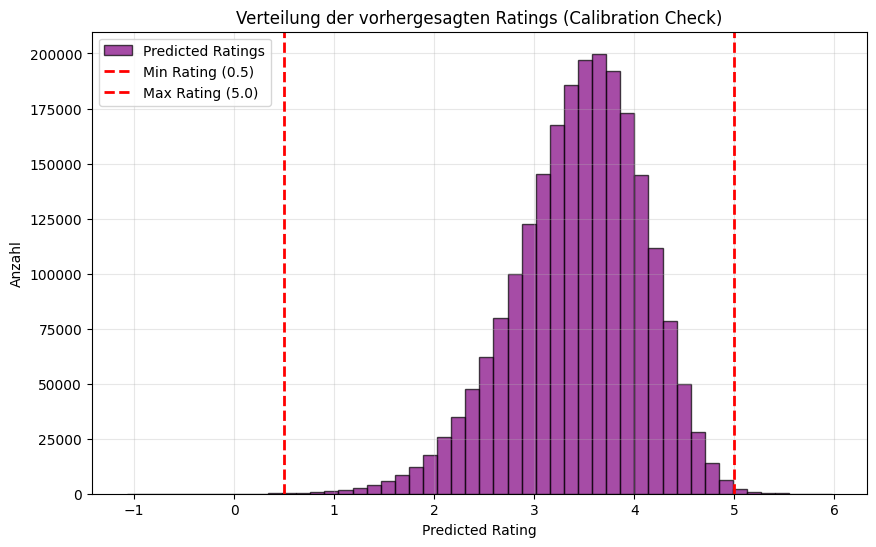

In [13]:
# ---------------------------------------------------------
# Kalibrierung & Verteilung der Predictions
# ---------------------------------------------------------

print("Analysiere die Verteilung aller vorhergesagten Ratings...")

# 1. Flatten der Matrix, um alle Werte in eine Liste zu bekommen
all_predictions = predicted_R.flatten()

# 2. Statistiken berechnen
min_pred = all_predictions.min()
max_pred = all_predictions.max()
mean_pred = all_predictions.mean()

print(f"Statistik der Vorhersagen:")
print(f"Min: {min_pred:.4f}")
print(f"Max: {max_pred:.4f}")  # Hier erwarten wir Werte > 5.0
print(f"Mean: {mean_pred:.4f}")

# 3. Histogramm plotten
plt.figure(figsize=(10, 6))
plt.hist(
    all_predictions,
    bins=50,
    color="purple",
    alpha=0.7,
    edgecolor="black",
    label="Predicted Ratings",
)

# Grenzen einzeichnen (0.5 und 5.0 sind die echten Grenzen)
plt.axvline(x=0.5, color="red", linestyle="--", linewidth=2, label="Min Rating (0.5)")
plt.axvline(x=5.0, color="red", linestyle="--", linewidth=2, label="Max Rating (5.0)")

plt.title("Verteilung der vorhergesagten Ratings (Calibration Check)")
plt.xlabel("Predicted Rating")
plt.ylabel("Anzahl")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [14]:
# ---------------------------------------------------------
# Ranking-Metriken & Coverage (Optional)
# ---------------------------------------------------------


def evaluate_ranking_metrics(model, train_matrix, test_matrix, top_n=10):
    """
    Berechnet Hit Rate (Recall) und Coverage für Leave-One-Out Split.
    """
    hits = 0
    total_users = 0
    recommended_items_global = set()

    # Alle Movie IDs (für Coverage Berechnung nötig)
    n_items = train_matrix.shape[1]

    # 1. Vorhersagen für ALLE User auf einmal (Matrix-Operation)
    print("Berechne Scores für alle User...")
    all_predictions = model.predict()  # Shape: (N_u, N_i)

    # Wir iterieren nur über User, die tatsächlich im Test-Set sind
    test_users_indices = np.where(np.sum(test_matrix != 0, axis=1) > 0)[0]

    print(f"Evaluiere Ranking für {len(test_users_indices)} User...")

    for user_idx in tqdm(test_users_indices):

        # A) Das eine versteckte Item finden (Ground Truth)
        # argmax gibt den Index des maximalen Werts (da alles andere 0 ist)
        # Hinweis: Bei Leave-One-Out ist nur 1 Wert > 0
        hidden_item_idx = np.argmax(test_matrix[user_idx])

        # B) Vorhersagen für diesen User holen
        user_preds = all_predictions[user_idx].copy()

        # C) Bereits gesehene Filme (Trainingsdaten) maskieren
        # Wir wollen ja nicht Trainingsdaten empfehlen
        train_items_mask = train_matrix[user_idx] != 0
        user_preds[train_items_mask] = -np.inf

        # D) Top-N Empfehlungen holen
        # argpartition ist schneller als sortieren
        top_n_indices = np.argpartition(user_preds, -top_n)[-top_n:]

        # Coverage tracken
        for idx in top_n_indices:
            recommended_items_global.add(idx)

        # E) Check: Ist das versteckte Item dabei?
        if hidden_item_idx in top_n_indices:
            hits += 1

        total_users += 1

    # Metriken berechnen
    hit_rate = hits / total_users
    coverage = len(recommended_items_global) / n_items

    return hit_rate, coverage


# ANWENDUNG
print("Starte Ranking-Evaluation...")
# Wir nutzen das best_model und den X_train/X_test Split aus Aufgabe 4
hit_rate, coverage = evaluate_ranking_metrics(best_model, X_train, X_test, top_n=10)

print(f"\n{'='*40}")
print(f"RANKING PERFORMANCE (Top-10)")
print(f"{'='*40}")
print(f"Hit Rate @ 10:    {hit_rate:.4f} ({hit_rate*100:.2f}%)")
print(f"Catalog Coverage: {coverage:.4f} ({coverage*100:.2f}%)")
print(f"Empfohlene Filme: {int(coverage * R.shape[1])} von {R.shape[1]}")

Starte Ranking-Evaluation...
Berechne Scores für alle User...
Evaluiere Ranking für 610 User...


100%|██████████| 610/610 [00:00<00:00, 21060.60it/s]


RANKING PERFORMANCE (Top-10)
Hit Rate @ 10:    0.0328 (3.28%)
Catalog Coverage: 0.1637 (16.37%)
Empfohlene Filme: 597 von 3647


Was hältst du von den Empfehlungen? Was ist dein Gesamteindruck vom Projekt? Gib Daniele Feedback zu deinen Erkenntnissen.

Das beste Modell hat folgende Hyper-Parameter:
- K=30: Anzahl latente Faktoren
- alpha=0.1: Regularisierungsfaktor
- lr=0.05: Lernrate
- epochs=50: Anzahl Trainings-Epochen

### Analyse der Empfehlungen:

Das Modell erkennt die Präferenzen der Benutzer gut. Dies ist besonders schön zu erkennen bei dem Benutzer ID=3. Dieser hat in seiner Historie den Film Escape from L.A gut bewertet (5.0 Sterne). Dieser Benutzer erhält die als 3. beste Empfehlung "Escape from New York". Es handelt sich bei diesem Film um einen Nachfolger von "Escape from L.A", was darauf hindeutet, dass das Modell in der Lage ist, thematisch ähnliche Filme zu empfehlen.

Das Genre-Clustering funktioniert mittelmässig bis gut. Mittels der Item-Item Similarity der latenten Faktoren ist zu erkennen dass "Star Wars: Episode II – Attack of the Clones" und "Star Wars: Episode III – Revenge of the Sith" ähnlich zu dem Film "Star Wars: Episode I – The Phantom Menace" sind. Das ist auch sinnvoll, da es sich bei diesen Filmen um Fortsetzungen handelt. Filme wie "The Matrix Revolutions" oder "Terminator 3" kann ich mir auch vorstellen, dass sie thematisch ähnlich sind. Jedoch empfinde ich, dass "Planet of the Apes" unpassend ist in dieser Liste. Mir wäre es lieber gewesen, wenn das Modell mehr auf Star Wars Filme fokussiert hätte.

### Gesamteindruck:


Es ist schwer zu beurteilen ob das Modell wirklich gute Empfehlungen generiert. Es ist schwierig zu sagen ob die empfohlenen Filme dem Geschmack der Benutzer entsprechen, da ich die Präferenzen der Benutzer nicht kenne. 

Aus diesem Grund habe ich auch noch weitere Analysen gemachtt. Diese Zusätzlichen Analsen sagen folgendes aus und das Modell schneidet folgendermassen ab:

| Analyse | Bedeutung | Modell-Performance |
|---------|-----------|--------------------|
| Interpretation der Latenten Faktoren | Prüft, ob die abstrakten Dimensionen der Matrix $M$ (Item-Faktoren) semantische Bedeutung haben (z.B. Genres oder Stimmungen). | Gemischt. Die Faktoren sind nicht monokausal (Ein Faktor = Ein Genre) interpretierbar (z.B. mischt Faktor 0 Comedy & Action). Es wurden jedoch komplexe Muster erkannt (z.B. Faktor 3 trennt "Arthouse/Drama" von "Slapstick"). Die Faktoren unterscheiden nicht zwischen Genres sondern unterscheiden den vibe eines Filmes. |
| Item-Item Ähnlichkeit (Sanity Check) | Prüft mittels Cosine Similarity, ob Filme, die im Vektorraum nahe beieinander liegen und auch inhaltlich zusammenpassen (z.B. "Star Wars"). | Exzellent. Das Modell gruppiert Filme logisch korrekt. Zum Beispiel wurden "Star Wars"-Filme fast ausschliesslich andere Star Wars Teile und Scinci Fiction Filme als nächste Nachbarn identifiziert. |
| Kalibrierung & Verteilung | Prüft, ob die vorhergesagten Ratings (Predictions) innerhalb der gültigen Skala [0.5, 5.0] liegen und realistisch verteilt sind. | Mangelhaft. Das Modell generiert Werte ausserhalb der Skala (Min: -1.07, Max: 5.97). Das Modell benötigt zwingend ein technisches Clipping vor dem Live-Gang. Die Verteilung hingegen ist Normalverteilt mit einem $\mu$ von 3.5 |
| Hit Rate @ 10 | Prüft die Präzision: Wie oft landet der eine "versteckte" Test-Film eines Nutzers tatsächlich in den Top-10 Empfehlungen? | Gut. Mit 3.28% ist das Modell etwa 12-mal besser als der Zufall (~0.28%). Es gelingt ihm zuverlässig, relevante Inhalte weit oben zu platzieren. |
| Catalog Coverage | Prüft die Diversität: Welcher Anteil des gesamten Filmkatalogs wird über alle Nutzer hinweg empfohlen? (Vermeidung von Filterblasen). | Gut. Mit 16.37% (597 Filme) empfiehlt das System nicht nur die wenigen Top-Blockbuster, sondern nutzt einen signifikanten Teil des Katalogs. |

Unteranderem muss erwähnt werden, dass das Modell derzeit nicht unterscheidet bei der Benutzerhistorie. Es werden alle Filme gleich gewichtet. Jedoch kann es auch sinnvoll sein, neuere Ratings höher zu gewichten als ältere. Der Grund dafür ist, dass sich der Geschmack eines Benutzers über die Zeit ändern kann. 

### Feedback an Daniele:

Ich würde Daniele folgendes Feedback geben:

#### Stärken:
- Inhaltliche Präzision: Das Modell erkennt Fortsetzungen und Franchises zuverlässig.
- Genre-Verständnis: Ähnliche Filme werden korrekt gruppiert (siehe Star Wars -> Science Fiction), rein basierend auf User-Verhalten.
- Personalisierung: Die Empfehlungen sind spezifisch auf den User-Geschmack zugeschnitten (Klassiker vs. Kult-Action vs. Animation).

#### Schwächen:
- Kalibrierung: Das Modell ist nicht perfekt kalibriert. Die Vorhersagen reichen von -1.07 bis 5.97. Da die Skala nur bis 5.0 geht, sollte zwingend ein Clipping implementiert werden.
- Interpretierbarkeit: Die latenten Faktoren sind "vermischt" (z.B. Faktor 0 mischt Comedy/Drama mit Action). Wir wissen dass eine Empfehlung passt, aber nicht immer warum (keine klaren "Horror"-Faktoren).
- Cold Start: Für komplett neue User ohne Ratings kann dieses Modell keine Vorhersagen treffen. Wir benötigen hier eine Fallback-Strategie (z.B. "Beliebteste Filme der Woche").
- Derzeit wird die movies.csv Datei nur für die Titel der Filme genutzt. Theoretisch könnten wir auch noch die Genres sowie auch IMDB Ratings in betracht ziehen und so ein wenig mehr aus dem Modell kitzeln. 

## Aufgabe 5 (7 Punkte)

Collaborative Filtering (CF) ist eine Unsupervised Learning-Methode.

Vergleiche CF mit NMF und K-Means, insbesondere auch hinsichtlich der meist verwendeten Optimierungsverfahren.

Welche der beiden Methoden könntest du auch für ein Recommender System einsetzen?  
Wie genau? Beschreibe ein mögliches Vorgehen inklusive Formulierung des Modellierungsansatzes.

#### Vergleich CF mit NMF und K-Means
- Collaborative Filtering (CF) / Matrix Factorization (MF):
  - **Ansatz**: CF wird häufig als Matrixfaktorisierungsproblem formuliert, bei dem die Rating-Matrix $Y$ durch das Produkt zweier kleinerer Matrizen $U$ und $V$ approximiert wird ($Y \approx UV^T$).
  - **Optimierungsverfahren**: Das Optimierungsproblem ist nicht konvex. Die gebräuchlichsten Verfahren zur Minimierung der Verlustfunktion (z. B. quadratischer Fehler) sind Alternating Least Squares (ALS), bei dem abwechselnd $U$ gegeben $V$ und $V$ gegeben $U$ optimiert werden, und Stochastic Gradient Descent (SGD), bei dem die Parameter iterativ für einzelne beobachtete Einträge angepasst werden. (Murphy Probabilistic Machine Learning, 2022, Kapitel 22.1.3 "Matrix factorization" und Kapitel 8 "Optimization")
- K-Means:
  - **Einordnung**: K-Means ist ein klassischer Algorithmus für Clustering. Es ist eine Methode der "Vektorquantisierung".
  - **Optimierung**: K-Means minimiert die Verzerrung (Distortion) mittels eines iterativen Verfahrens (Lloyd's Algorithmus). Dieser Ansatz wird als "Alternating Minimization" beschrieben, da er abwechselnd die Cluster-Zuweisungen ($z_n$) und die Cluster-Zentren ($\mu_k$) aktualisiert (Murphy Probabilistic Machine Learning, Kapitel 21.3 "K-means clustering").
- NMF (Non-negative Matrix Factorization):
  - **Einordnung**: NMF wird oft im Kontext von Dimensionality Reduction (Kapitel 20) oder als spezielle Form der Matrixfaktorisierung behandelt, bei der die Faktoren nicht-negativ sein müssen ($W, H \ge 0$). Dies führt zu interpretierbaren, "teil-basierten" Repräsentationen.
  - **Optimierung**: Aufgrund der Nicht-Negativitäts-Nebenbedingung können Standard-Gradientenverfahren nicht direkt angewendet werden. Stattdessen werden oft Multiplicative Update Rules oder projizierte Gradientenverfahren verwendet, die sicherstellen, dass die Parameter positiv bleiben. Dies ist eine Variante der Block-Coordinate-Descent Methoden (Murphy Probabilistic Machine Learning, Kapitel 20.4 oder allgemeine Optimierung in Kapitel 8).
  
#### Einsatz für ein Recommender System

Theoretisch könnten sowohl K-Means als auch NMF für ein Recommender System eingesetzt werden. Hier beschreibe ich, wie K-Means verwendet werden könnte:

**Die Grundidee:**
Anstatt für jeden Nutzer individuell komplexe Berechnungen anzustellen, gruppieren wir ähnliche Nutzer in "Gruppen" (Cluster). Ein Nutzer bekommt dann Empfehlungen basierend auf dem Geschmack seiner Gruppe.

**Detailliertes Vorgehen:**

1. **Datenrepräsentation (Die Tabelle vorbereiten)**
   Wir stellen uns die Daten als eine riesige Tabelle (Matrix $Y$) vor: Jede Zeile ist ein **User**, jede Spalte ist ein **Film** (Item).
   * **Das Problem:** Diese Tabelle ist fast leer (sparse), weil kein Nutzer alle Filme gesehen hat. K-Means kann aber nicht mit "leeren Feldern" rechnen; es braucht vollständige Zahlenreihen.
   * **Die Lösung (Imputation):** Bevor wir starten, müssen wir die Lücken füllen. Wir ersetzen fehlende Bewertungen z. B. durch $0$ oder durch den Durchschnittswert aller Nutzer für diesen Film. Jetzt hat jeder User einen vollständigen "Geschmacks-Vektor" $x_u$. Wir können auch zuerst ein Row centering durchführen und dann die fehlenden Werte mit $0$ auffüllen, sodass die Zentroiden später den durchschnittlichen Geschmack der Gruppe repräsentieren.

2. **Modellierung (Das Clustering / Der Lernprozess)**
   Jetzt wenden wir den K-Means-Algorithmus an, um Ordnung in die Nutzer-Massen zu bringen. Das Ziel ist es, $K$ verschiedene **"Durchschnitts-User" (Zentroide)** zu finden, die stellvertretend für bestimmte Geschmäcker stehen (z. B. der "Action-Fan", der "Romantik-Fan", der "Alles-Gucker").

   **So funktioniert der Algorithmus schrittweise (Alternating Minimization):**
   1. **Start:** Wir wählen zufällig $K$ Punkte im Raum als vorläufige Zentren (Zentroide) aus.
   2. **Schritt A (Zuweisung):** Wir nehmen jeden echten User und schauen: Zu welchem der $K$ Zentroide hat er die kürzeste Distanz? (Wer ist ihm am ähnlichsten?). Der User wird diesem Cluster zugeordnet.
   3. **Schritt B (Update):** Nachdem alle User zugeordnet sind, berechnen wir die Zentroide neu. Der neue Zentroid eines Clusters ist exakt der **Mittelwert** aller User, die gerade diesem Cluster angehören. Der Zentroid "rutscht" also in die Mitte seiner Gruppe.
   4. **Wiederholung:** Wir wiederholen Schritt A und B so lange, bis sich die Zentroide nicht mehr bewegen.
   5. **Ergebnis:** Wir haben nun $K$ Gruppen und für jede Gruppe einen perfekten Prototyp $\mu_k$, der den durchschnittlichen Geschmack dieser Gruppe repräsentiert.

3. **Prediction (Die Empfehlung geben)**
   Wie empfehlen wir nun einem User $u$ einen Film?
   * **Gruppe finden:** Wir schauen, welchem der $K$ Prototypen (Zentroide) der User am ähnlichsten ist (geringster euklidischer Abstand). Sagen wir, er landet in Cluster $k$.
   * **Empfehlen:** Wir gehen davon aus, dass der User den Geschmack seiner Gruppe teilt. Um vorherzusagen, wie er einen Film bewerten würde, schauen wir einfach nach, wie der **Prototyp $\mu_k$** diesen Film bewertet hat.
   * **Interpretation:** Die Vorhersage $\hat{y}_{ui}$ ist also nichts anderes als der Wert des Zentroiden für diesen Film. Wenn der "Durchschnitts-Action-Fan" (Zentroid) dem Film "Terminator" 5 Sterne gibt, prognostizieren wir für unseren User ebenfalls 5 Sterne – sofern er ihn noch nicht gesehen hat.

**Zusammenfassung im Kontext von Murphy:**
In der Fachsprache (Murphy Kapitel 21) nennt man das **Vector Quantization (VQ)**. Wir komprimieren die riesige Vielfalt aller individuellen User auf wenige ($K$) Repräsentanten (das sogenannte "Codebook"). Das Modell lernt also keine individuellen Nuancen, sondern weist jedem User einfach das Verhalten seines Stereotyps zu.